In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib. collections import PatchCollection
import sys 
from build_solver import build_erg_time_opt_solver
sys.path.append('../')

from time_opt_erg_lib.obstacle import Obstacle


In [2]:
args = {
    'N' : 800, 
    'x0' : np.array([2.0, 2.2])*1,
    'xf' : np.array([98.8, 92.0])*1,
    'erg_ub' : 0.0001,
    'alpha' : 0.9,
    'wrksp_bnds' : np.array([[0.,100.],[0.,100.]])
}

In [3]:
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=20_000, eps=1e-8, alpha=1.00001)

I0000 00:00:1704209860.265595       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


done in  17720  iterations


NameError: name 'Circle' is not defined

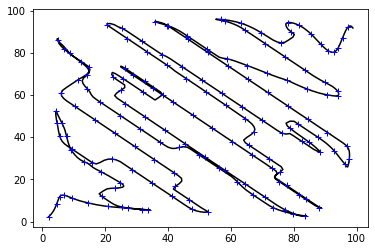

In [4]:
sol = solver.get_solution()

fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')

patches = []
for ob in obs: 
    circ = ob.draw()
    patches.append(circ)

ax.add_collection(PatchCollection(patches, color='g'))
ax.axis('square')
ax.set_xlim(0,100)
ax.set_ylim(0,100)

plt.savefig('scaled_search_forest.pdf')


In [10]:
import dill as pkl

file = open('./data/forest_sol.pkl', 'wb')
pkl.dump(sol, file)
file.close()

file = open('./data/obs_loc.pkl', 'wb')
pkl.dump(obs, file)
file.close()


In [13]:
obs = pkl.load(open('./data/obs_loc.pkl', 'rb'))

In [17]:
sol['tf']

Array(50.77798, dtype=float32, weak_type=True)